# Начало


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
import pylab
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#df_calls = pd.read_csv('C://Users//User//Documents//.ipynb_checkpoints//calls.csv', sep='\t')
#df_internet = pd.read_csv('C://Users//User//Documents//.ipynb_checkpoints//internet.csv', sep='\t')
#df_messages = pd.read_csv('C://Users//User//Documents//.ipynb_checkpoints//messages.csv', sep='\t')
#df_tariffs = pd.read_csv('C://Users//User//Documents//.ipynb_checkpoints//tariffs.csv', sep='\t')
#df_users = pd.read_csv('C://Users//User//Documents//.ipynb_checkpoints//users.csv', sep='\t')

calls = pd.read_csv('/datasets/calls.csv', sep='\t')
internet = pd.read_csv('/datasets/internet.csv', sep='\t')
messages = pd.read_csv('/datasets/messages.csv', sep='\t')
tariffs = pd.read_csv('/datasets/tariffs.csv', sep='\t')
users = pd.read_csv('/datasets/users.csv', sep='\t')

# Просмотр датасетов и исправление ошибок

Рассмотрим датафреймы по порядку и исправим некоторые ошибки.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 1 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   id,call_date,duration,user_id  202607 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [4]:
calls = calls['id,call_date,duration,user_id'].str.split(',', expand=True)
calls.columns = ['id', 'call_date', 'duration', 'user_id']
calls['duration'] = calls['duration'].astype('float64')
calls['call_date'] = pd.to_datetime(calls['call_date'])
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 1 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   ,id,mb_used,session_date,user_id  149396 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [7]:
internet = internet[',id,mb_used,session_date,user_id'].str.split(',', expand=True)
internet.columns = ['index','id', 'mb_used', 'session_date' , 'user_id']
internet['mb_used'] = internet['mb_used'].astype('float64')
internet['session_date'] = pd.to_datetime(internet['session_date'])
display(internet.head())

,index,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         149396 non-null  object        
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.7+ MB


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id,message_date,user_id  123036 non-null  object
dtypes: object(1)
memory usage: 961.3+ KB


In [10]:
messages = messages['id,message_date,user_id'].str.split(',', expand=True)
messages.columns = ['id', 'message_date', 'user_id']
messages['message_date'] = pd.to_datetime(messages['message_date'])
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name  2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


In [12]:
tariffs = tariffs['messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name'].str.split(',', expand=True)
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
tariffs['rub_monthly_fee'] = tariffs['rub_monthly_fee'].astype('int64')
tariffs['minutes_included'] = tariffs['minutes_included'].astype('int64')
tariffs['messages_included'] = tariffs['messages_included'].astype('int64')
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int64')
tariffs['rub_per_minute'] = tariffs['rub_per_minute'].astype('int64')
tariffs['rub_per_message'] = tariffs['rub_per_message'].astype('int64')
tariffs['rub_per_gb'] = tariffs['rub_per_gb'].astype('int64')

In [13]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   rub_monthly_fee        2 non-null      int64  
 4   rub_per_gb             2 non-null      int64  
 5   rub_per_message        2 non-null      int64  
 6   rub_per_minute         2 non-null      int64  
 7   tariff                 2 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 256.0+ bytes


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   user_id,age,churn_date,city,first_name,last_name,reg_date,tariff  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [17]:
users = users['user_id,age,churn_date,city,first_name,last_name,reg_date,tariff'].str.split(',', expand=True)
users.columns = ['user_id', 'age', 'churn_date', 'city' ,'first_name', 'last_name', 'reg_date', 'tariff']
users['age'] = users['age'].astype('int64')
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [18]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Разберемся с тем,что мы делали на примере df_calls.Сначала мы применили метод info() к датасету df_calls и после этого увидели,что 4 столбца соединены в 1,поэтому была необходимость разделить данные..Увидели,что в столбцах тип данных object.Так как это длительность звонка в минутах,то мы изменили их на float,а дату изменили на дату. Мы проанализировали данные,привели их к нормальному виду.Ошибки были связаны с тем,что все столбцы были в одну строчку.Это мы успешно исправили,а также исправили тип данных там,где это нужно.Двигаемся дальше.

# Подсчеты

Теперь нам необходимо посчитать для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.

В первоначальной версии проекта я соединил все таблицы в один датасет и начал работать таким образом.В этот раз поступлю немного иначе.Разберемся сначала с df_calls.Добавим столбец с месяцем,а также дропнем все звонки,которые длились 0 секунд,а те,которые длились от 0 до минуты, округлим до 1 минуты.Так как «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.

In [20]:
def func_ceil(value):
    return np.ceil(value)

In [21]:
calls['duration'] = calls['duration'].apply(func_ceil).astype('int64')
calls = calls.query('duration >= 1')
display(calls.head())

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000


In [22]:
calls['month'] = calls['call_date'].dt.strftime('%B')

In [23]:
internet['month'] = internet['session_date'].dt.strftime('%B')

In [24]:
messages['month'] = messages['message_date'].dt.strftime('%B')

In [25]:
users.set_index('user_id', inplace=True)
display(users.head())

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<AxesSubplot:>

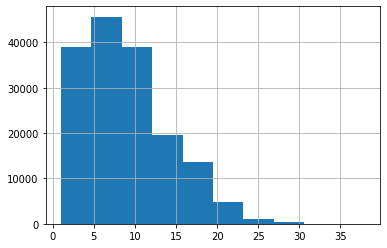

In [26]:
calls['duration'].hist()

<AxesSubplot:>

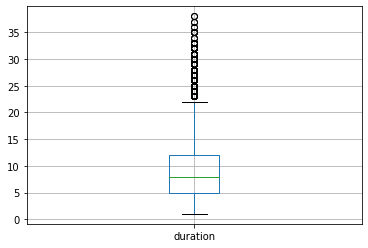

In [27]:
calls.boxplot()

<AxesSubplot:>

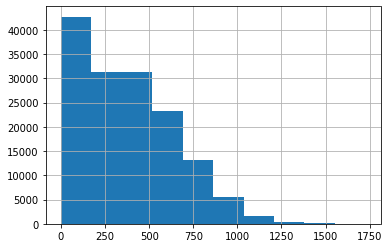

In [28]:
internet['mb_used'].hist()

<AxesSubplot:>

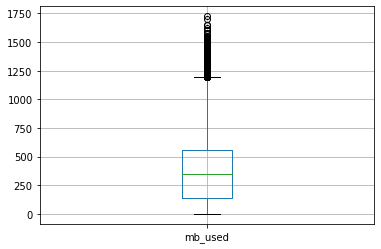

In [29]:
internet.boxplot()

Довольно странные гистограммы получились. Избавимся от редких и выбывающихся значений.Редкими и выбивающимися значениями будем считать все значения,которые ниже или выше Q1–1.5IQR и Q3 + 1.5IQR.

In [36]:
internet.head()

,index,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,November
1,1,1000_1,1052.81,2018-09-07,1000,September
2,2,1000_2,1197.26,2018-06-25,1000,June
3,3,1000_3,550.27,2018-08-22,1000,August
4,4,1000_4,302.56,2018-09-24,1000,September


In [40]:
for row in internet['mb_used']:
    if row < 0:
        display(row)

In [38]:
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [43]:
display(users.duplicated().sum())

0

In [44]:
for row in users['age']:
    if row < 0:
        display(row)

In [34]:
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December
7,1000_7,2018-08-22,19,1000,August
8,1000_8,2018-09-15,19,1000,September


In [45]:
for row in calls['duration']:
    if row < 0:
        display(row)

In [31]:
calls_month = calls.pivot_table(index=['user_id', 'month'], aggfunc={'duration': 'count'}).fillna(0).astype('int64')
calls_month.columns = ['calls_count']
duration_month = calls.pivot_table(index=['user_id', 'month'], aggfunc={'duration': 'sum'}).fillna(0).astype('int64')
duration_month.columns = ['sum_duration']
mb_used_month = internet.pivot_table(index=['user_id','month'], aggfunc={'mb_used': 'sum'}).fillna(0).astype('int64')
mb_used_month = (mb_used_month['mb_used'] / 1024).apply(func_ceil)
mb_used_month.columns = ['mb_used']
messages_month = messages.pivot_table(index=['user_id','month'], aggfunc={'id': 'count'}).fillna(0).astype('int64')
messages_month.columns = ['messages_count']

In [32]:
profit = calls_month.join([duration_month, messages_month, mb_used_month], how='outer').fillna(0).astype('int64')
tariffs_grouped = {'smart' : tariffs.loc[:,'messages_included':'rub_per_minute'].loc[0], 'ultra' : tariffs.loc[:,'messages_included':'rub_per_minute'].loc[1]}
profit = profit.join(users['tariff'])
profit = profit.join(users['city'])

In [33]:
profit.head(15)

calls_count  sum_duration  messages_count  mb_used tariff  \
user_id month                                                                  
1000    August              41           384              81       14  ultra   
        December            37           309              70       10  ultra   
        July                41           340              75       14  ultra   
        June                28           172              60       22  ultra   
        May                 17           159              22        3  ultra   
        November            36           313              58       12  ultra   
        October             43           327              73       15  ultra   
        September           46           466              57       15  ultra   
1001    December            47           414               0       14  smart   
        November            45           430               0       18  smart   
1002    August              37           289              13       20  smart   
        December            27           236              12       18  smart   
        July                20           187              11       18  smart   
        June                13            94               4       11  smart   
        November            25           243              16       19  smart   

                          city  
user_id month                   
1000    August       Краснодар  
        December     Краснодар  
        July         Краснодар  
        June         Краснодар  
        May          Краснодар  
        November     Краснодар  
        October      Краснодар  
        September    Краснодар  
1001    December        Москва  
        November        Москва  
1002    August     Стерлитамак  
        December   Стерлитамак  
        July       Стерлитамак  
        June       Стерлитамак  
        November   Стерлитамак

In [34]:
def profit_calculation(row):
    tariff_name = users.loc[row.name[0], 'tariff']
    messages_included, mb_per_month_included, minutes_included, monthly_fee, rub_per_gb , rub_per_message, rub_per_minute = tariffs_grouped[tariff_name]
    result = monthly_fee
    if row['sum_duration'] > minutes_included:
        result_minutes = (row['sum_duration'] - minutes_included) * rub_per_minute
        result += result_minutes
    if row['messages_count'] > messages_included:
        result_messages = (row['messages_count'] - messages_included) * rub_per_message
        result += result_messages
    if row['mb_used'] > mb_per_month_included:
        result_mb = (row['mb_used'] - mb_per_month_included) * rub_per_gb
        result += result_mb
    return result


In [35]:
profit['total'] = profit.apply(profit_calculation, axis=1)
display(profit.head(15))

calls_count  sum_duration  messages_count  mb_used tariff  \
user_id month                                                                  
1000    August              41           384              81       14  ultra   
        December            37           309              70       10  ultra   
        July                41           340              75       14  ultra   
        June                28           172              60       22  ultra   
        May                 17           159              22        3  ultra   
        November            36           313              58       12  ultra   
        October             43           327              73       15  ultra   
        September           46           466              57       15  ultra   
1001    December            47           414               0       14  smart   
        November            45           430               0       18  smart   
1002    August              37           289              13       20  smart   
        December            27           236              12       18  smart   
        July                20           187              11       18  smart   
        June                13            94               4       11  smart   
        November            25           243              16       19  smart   

                          city   total  
user_id month                           
1000    August       Краснодар  1950.0  
        December     Краснодар  1950.0  
        July         Краснодар  1950.0  
        June         Краснодар  1950.0  
        May          Краснодар  1950.0  
        November     Краснодар  1950.0  
        October      Краснодар  1950.0  
        September    Краснодар  1950.0  
1001    December        Москва   550.0  
        November        Москва  1150.0  
1002    August     Стерлитамак  1550.0  
        December   Стерлитамак  1150.0  
        July       Стерлитамак  1150.0  
        June       Стерлитамак   550.0  
        November   Стерлитамак  1350.0

## Минивывод:
Опишу все действия последовательно.В данном разделе мы сначала создали функцию:она округляет число в бОльшую сторону,она нам требовалась для столбцов duration и mb_used,т.к это было необходимо в следствие примечания*.Потом мы дропнули все звонки с длительностью в 0 секунд,ибо их было много и при построении гистограмм они бы искажали данных.Позже мы добавили в датафреймы df_calls, df_internet и df_messages столбец с месяцем.Далее мы ввели новые индексы в df_users.Потом создали пивот таблицы с кол-вом звонков для каждого пользователя,общую длительность разговоров для каждого пользователя, общее кол-во сообщений для каждого пользователя и потраченного интернет-трафика.И в конце концов мы посчитали прибыль.Для этого нам тоже потребовалось создание функции и объединение всех пивот таблиц в одну. 
### *Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Анализ данных

В этом разделе мы опишем поведение клиентов оператора, исходя из выборки.Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

calls_count           
tariff          smart      ultra
month                           
April       40.973214  51.072727
August      46.621277  56.850467
December    52.884273  66.107914
February    32.120690  33.750000
January     21.588235  45.666667
July        45.129353  60.461538
June        43.902439  53.261905
March       43.272727  53.054054
May         43.659574  57.119403
November    48.462025  59.791045
October     47.217687  61.764228
September   47.384615  59.556522

sum_duration            
tariff           smart       ultra
month                             
April       355.223214  433.418182
August      405.757447  494.822430
December    459.908012  570.719424
February    287.517241  291.041667
January     196.588235  403.555556
July        391.900498  525.538462
June        381.085366  460.761905
March       376.064935  460.324324
May         374.191489  489.134328
November    417.873418  518.731343
October     411.513605  536.650407
September   411.384615  518.408696

messages_count           
tariff             smart      ultra
month                              
April          30.741071  31.563636
August         33.638298  48.439252
December       35.994065  60.611511
February       24.086207  21.958333
January        18.235294  33.777778
July           33.751244  49.846154
June           33.402439  41.726190
March          31.857143  32.297297
May            33.773050  37.850746
November       34.075949  55.791045
October        33.765306  58.430894
September      33.638462  52.286957

mb_used           
tariff         smart      ultra
month                          
April      13.571429  16.345455
August     16.600000  19.186916
December   18.127596  21.273381
February   11.775862  11.708333
January     8.735294  12.888889
July       15.820896  19.956044
June       15.853659  18.369048
March      15.168831  17.081081
May        15.765957  19.014925
November   16.911392  19.328358
October    16.765306  19.487805
September  16.315385  18.730435

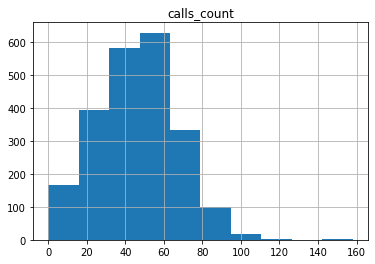

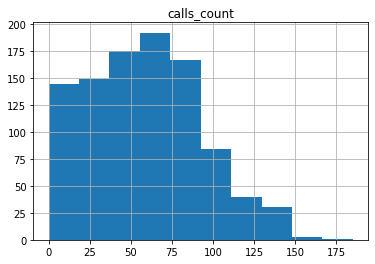

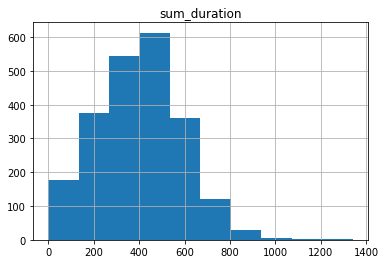

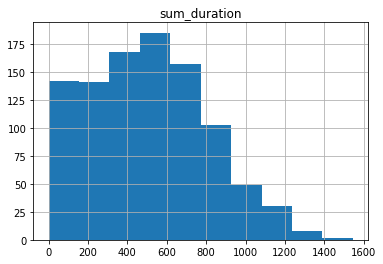

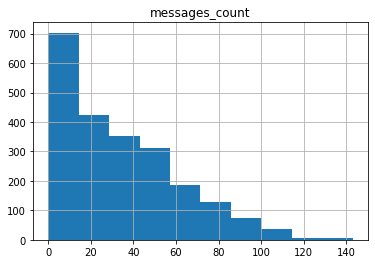

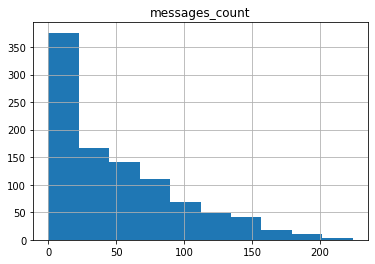

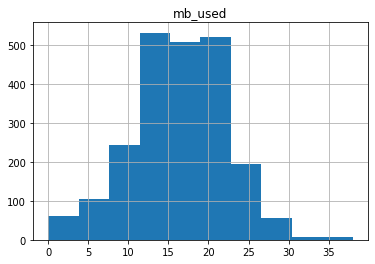

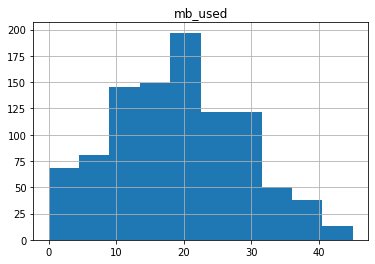

In [36]:
for column in profit.loc[:,'calls_count': 'mb_used']:
    profit_mean = profit.pivot_table(index='month' ,columns='tariff', aggfunc={column: 'mean'})
    profit.query("tariff == 'smart'").hist(column)
    profit.query("tariff == 'ultra'").hist(column)
    display(profit_mean)

calls_count             
tariff          smart        ultra
month                             
April      423.071348   831.920539
August     405.509802  1227.826486
December   475.346686  1459.401314
February   436.774652  1076.717391
January    254.855615   944.000000
July       389.963184  1148.495726
June       371.904534  1046.267929
March      430.174641  1263.052553
May        427.340426  1057.924921
November   372.452522  1184.196611
October    414.614567  1315.066907
September  396.114048  1293.863005

sum_duration               
tariff            smart          ultra
month                                 
April      32000.571348   64594.544108
August     32056.039207   91857.619115
December   36638.542108  108740.754040
February   35293.236540   83232.215580
January    22341.825312   65448.527778
July       30221.410050   87999.429060
June       29194.618435   83530.810098
March      34450.798360  101842.003003
May        32545.227356   76993.057440
November   28914.275990   89762.919762
October    33435.329166   99542.278422
September  31262.052272   97603.226240

messages_count             
tariff             smart        ultra
month                                
April         602.139559  1407.287542
August        838.257501  2171.739199
December      934.952346  2681.978417
February      473.097701   716.824275
January       262.367201   940.694444
July          799.887811  2372.042735
June          806.806374  1986.297619
March         718.492481  1732.381381
May           730.990983  1624.644052
November      805.937071  2476.948491
October       816.111966  2697.181661
September     790.617820  2152.855530

mb_used            
tariff         smart       ultra
month                           
April      31.166023   82.711785
August     29.095726   99.134544
December   29.427123   98.026170
February   36.492740  104.563406
January    39.412656   40.111111
July       33.737761   89.709158
June       31.622625   80.356139
March      32.721121  108.076577
May        34.694833   91.651289
November   26.804822   88.207160
October    32.630738   86.694522
September  25.622156   79.426697

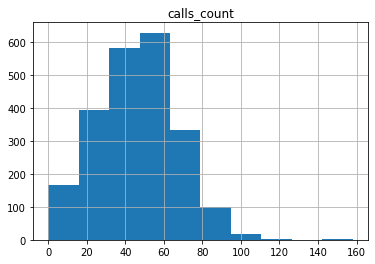

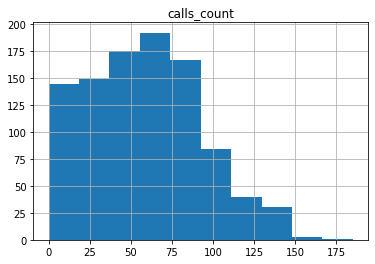

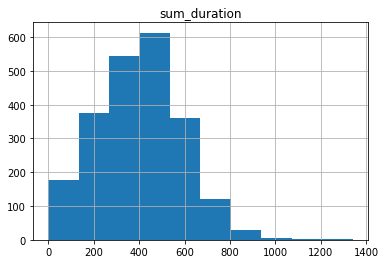

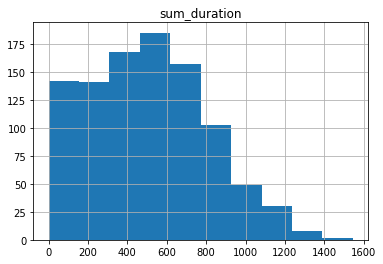

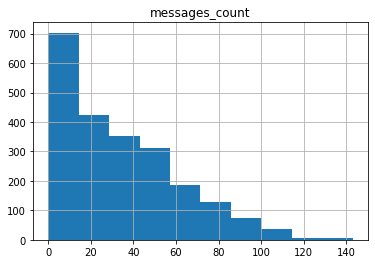

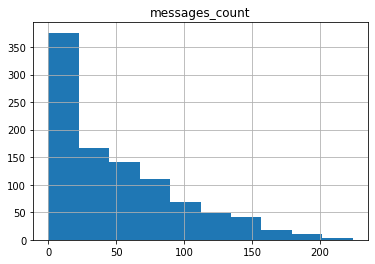

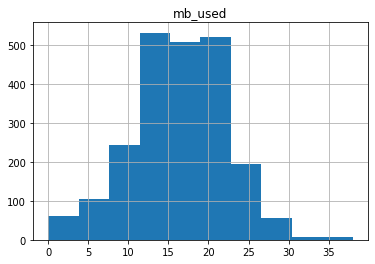

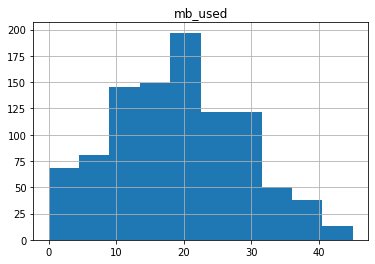

In [37]:
for column in profit.loc[:,'calls_count': 'mb_used']:
    profit_var = profit.pivot_table(index='month' ,columns='tariff', aggfunc={column: 'var'})
    profit.query("tariff == 'smart'").hist(column)
    profit.query("tariff == 'ultra'").hist(column)
    display(profit_var)

,calls_count
tariff,
smart,20.785495
ultra,35.107396


,sum_duration
tariff,
smart,183.530946
ultra,305.814258


,messages_count
tariff,
smart,28.227876
ultra,47.804457


,mb_used
tariff,
smart,5.721194
ultra,9.579629


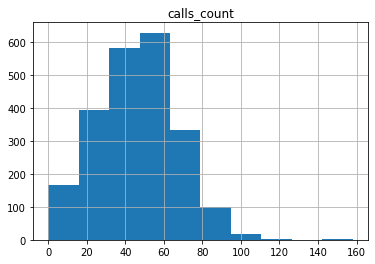

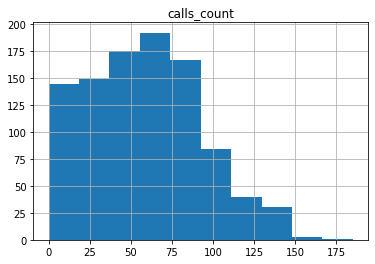

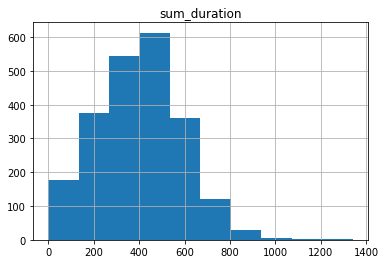

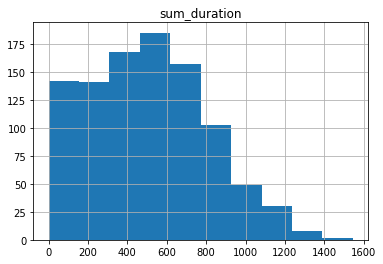

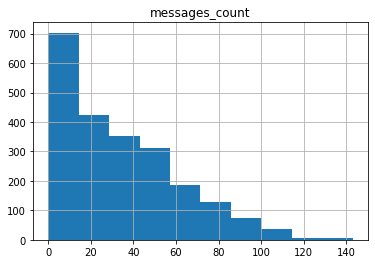

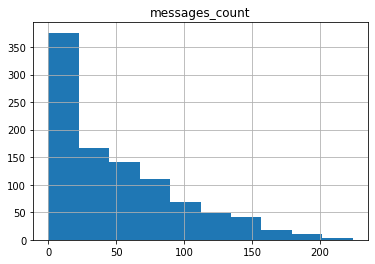

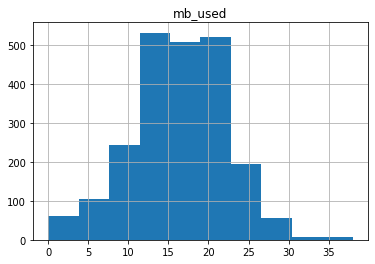

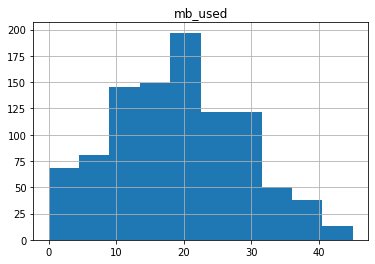

In [38]:
for column in profit.loc[:,'calls_count': 'mb_used']:
    profit_std = profit.pivot_table(index='tariff', aggfunc={column: 'std'})
    profit.query("tariff == 'smart'").hist(column)
    profit.query("tariff == 'ultra'").hist(column)
    display(profit_std)

In [47]:
# код ревьюера
profit.pivot_table(index = 'tariff', values = ['sum_duration', 'messages_count', 'messages_count'],
                aggfunc = ['mean', 'std', 'var'])

mean                                        std  \
       messages_count messages_count sum_duration messages_count   
tariff                                                             
smart       33.384029      33.384029   402.183939      28.227876   
ultra       49.363452      49.363452   505.784772      47.804457   

                                              var                               
       messages_count sum_duration messages_count messages_count  sum_duration  
tariff                                                                          
smart       28.227876   183.530946     796.812958     796.812958  33683.607983  
ultra       47.804457   305.814258    2285.266143    2285.266143  93522.360134

## Мини-вывод:
Мы проанализировали данные.Для этого мы активно использовали pivot_table.Что можем сказать: 
    1)Средние значения по количеству звонков в тарифе ultra больше,чем ср.знач в тарифе smart.Месяц с наибольшим ср.знач для обоих тарифов является декабрь.Наименьшим для тарифа smart является январь месяц,для ultra - февраль.
    Средние значения по длительности звонка в тарифе ultra больше, чем ср.знач в тарифе smart во всех месяцах.Месяц с     наибольшим средним значением для обоих тарифов является декабрь.Наименьшим для тарифа smart является январь месяц,для ultra - февраль.Связано это с тем,что в декабре было больше всего звонков в сумме.А в случае января для smart и для ultra в феврале ситуация полностью наоборот.
    Средние значения по кол-ву сообщений также в тарифе ultra больше, чем ср.знач в тарифе smart во всех месяцах.Месяц с     наибольшим средним значением для обоих тарифов снова является декабрь.Наименьшими месяцами для тарифов также являются январь и февраль(smart-январь, ultra - февраль).
    Аналогичная ситуация по ср.знач в кол-ве использованных гигабайт интернета(в тарифе ultra больше, чем ср.знач в тарифе smart во всех месяцах).Месяц с наибольшим средним значением для обоих тарифов является декабрь.Наименьшими же являются январь и февраль.
    Опишем поведение клиентов оператора,судя по ср.значениям.Наиболее активным месяцем является декабрь.Именно в этот месяц клиентам оператора нужно больше всего минут разговора, сообщений и объёма интернет-трафика.Это связано с Новым Годом.Люди звонят/пишут друг другу и думают что подарить, обсуждают подарки, поздравляют с праздником.Наименее активными месяцами в этом плане являются январь и февраль.Причину описать трудно,возможно,причина тоже кроется в Новом Годе.После празднования люди,возможно,ходят побыть одни и настроиться на ближайший год. 
     2)Поговорим о дисперсии.
     Дисперсия по количеству звонков в тарифе ultra больше, дисперсия в тарифе smart во всех месяцах.Месяц с наибольшим значением дисперсии для тарифов является декабрь.Наименьшим же для тарифа smart является январь, для ultra - май.
     Дисперсия по длительности звонка в тарифе ultra больше, чем дисперсия в тарифе smart во всех месяцах.Месяц с наибольшим значением дисперсии для тарифа smart является декабрь,для тарифа ultra - март.Наименьшим же для обоих тарифов также является январь месяц.
     Дисперсия по кол-ву сообщений в тарифе ultra больше, чем дисперсия в тарифе smart во всех месяцах.Месяц с наибольшим значением дисперсии для тарифа smart является декабрь,для тарифа ultra - октябрь.Наименьшими же для тарифа smart является январь, для ultra - февраль
     Дисперсия по объему интернет-трафика в тарифе smart больше, чем дисперсия в тарифе ultra во всех месяцах,кроме ноября.Месяц с наибольшим значением дисперсии для тарифа smart является январь,для тарифа ultra - август.Наименьшими для smart является ноябрь, для ultra - январь.
     Опишем поведение клиентов оператора,судя по дисперсии.Наиболее активным месяцем является декабрь для тарифа smart, для ultra - трудно определить,т.к для каждого "подсчета" наиб.значения находятся в разных месяцах.
     3)Стандартное отклонение.
     Ситуация аналогичная с дисперсией,т.к стандартное отклонение = корень из дисперсии.
     4)Гистограммы.
     Пик по количеству звонков в тарифе ultra находится в 60.Потом график резко скашивается вправо,значит скошенность положительная.Пик по длительности разговора в тарифе smart находится в 50-60.Потом график также скашивается вправо,но не так резко,как в тарифе ultra.Скошенность также положительная.
     Пик по длительности разговоров в тарифе ultra находится в 500-550.Потом график скашивается вправо,значит скошенность положительная.Пик по длительности разговора в тарифе smart находится в 450-500.Потом график резко скашивается вправо,значит скошенность положительная.
     Пик по кол-ву сообщений в тарифе ultrа находится в 0-10.Потом график также сильно скашивается вправо.В тарифе smart пик находится в 0-5.Ситуация аналогичная как по длительности разговора.
     Пик по объему интернет-трафика находится в 15 и 20 в тарифе ultra.В smart 15.

# Проверка гипотез

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.Тип у данной гипотезы,как я ее сформулировал,будет двусторонний,т.е нулевая гипотеза - выручка от пользователей тарифов "Ультра" и "Смарт" не различается; альтернативная гипотеза - выручка от пользователей тарифов "Ультра" и "Смарт" различается.

In [39]:
smart = []
ultra = []

In [40]:
for row in profit.query('tariff == "smart"')['total']:
    smart.append(row)
for row in profit.query('tariff == "ultra"')['total']:
    ultra.append(row)

In [41]:
alpha = .05
results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.010193769427187e-176
Отвергаем нулевую гипотезу


Мы смогли отвергнуть нулевую гипотезу,а значит,что выручка от пользователей тарифов "Ультра" и "Смарт" различается.


Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.Тип у данной гипотезы,как я ее сформулировал,также будет двусторонней,т.е нулевая гипотеза - выручка от пользователей из Москвы и других регионов не различается; альтернативная гипотеза - выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.

In [42]:
moscow = []
for row in profit.query('city == "Москва"')['total']:
    moscow.append(row)
    
other_cities = []
for row in profit.query('city != "Москва"')['total']:
    other_cities.append(row)

In [43]:
alpha = .05
results = st.ttest_ind(
    moscow, 
    other_cities)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4930897488153082
Не получилось отвергнуть нулевую гипотезу


Мы не смогли отвергнуть нулевую гипотезу,а значит,что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

# Вывод

Мы провели анализ преврарительный анализ тарифов на небольшой выборке клиентов.В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Для этого мы сначала просмотрели все данные.После небольшого ознакомления было понятно,что в данных есть небольшие ошибки.Например,все 4 столбца были объединены в один и у всех был тип данных object.Мы успешно разъединили эти столбцы,а потом исправили типы данных.
Потом перед нами встал выбор объединять ли все датафреймы в один или нет.Мы решили этого не делать в силу того,что в разных датафреймах разное кол-во строк,соответственно,данные снова станут с пропусками и тд.Это довольно сильно усложнило бы жизнь.
Переходя к разделу "Подсчеты" мы снова решили просмотреть данные.В датафрейме df_calls мы решили избавиться от звонков длительность которых была равна 0.Эти звонки,вероятнее всего,были безответными.Поэтому,они бы не показали полную картину и сильно искажали бы данные.В датафреймах df_messages, df_internet и df_calls мы добавили столбец с месяцами,чтобы при анализе увидеть информацию помесячно для более точного анализа.После перешли к созданию пивот таблиц для подсчета кол-ва звонков,потраченных звонков,отправленных смс и потраченных интернет-трафика в гигабайтах.Сделали это мы для дальнейшего подсчета прибыли.Чтобы подсчитать прибыль с каждого клиента мы создали функцию и применили ее.
Для более точного анализа рассчитали ср.знач,дисперсию и стандартное отклонение для кол-ва звонков,длительность звонков,кол-ва сообщений и потраченных гигабайт, и на основе этого построили пивот таблицы и гистограммы.
Далее начали проверять гипотезы.Пришли к тому,что выручка от пользователей тарифов "Ультра" и "Смарт" различается, и что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.